<a href="https://colab.research.google.com/github/shachimaurya23/Learning/blob/main/Pytorch_learning_ANN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using ANN to Classify Fashion MNIST data w/o GPU

In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42) # Set random seeds for reproducibility

In [3]:
df=pd.read_csv("fmnist_small.csv")

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


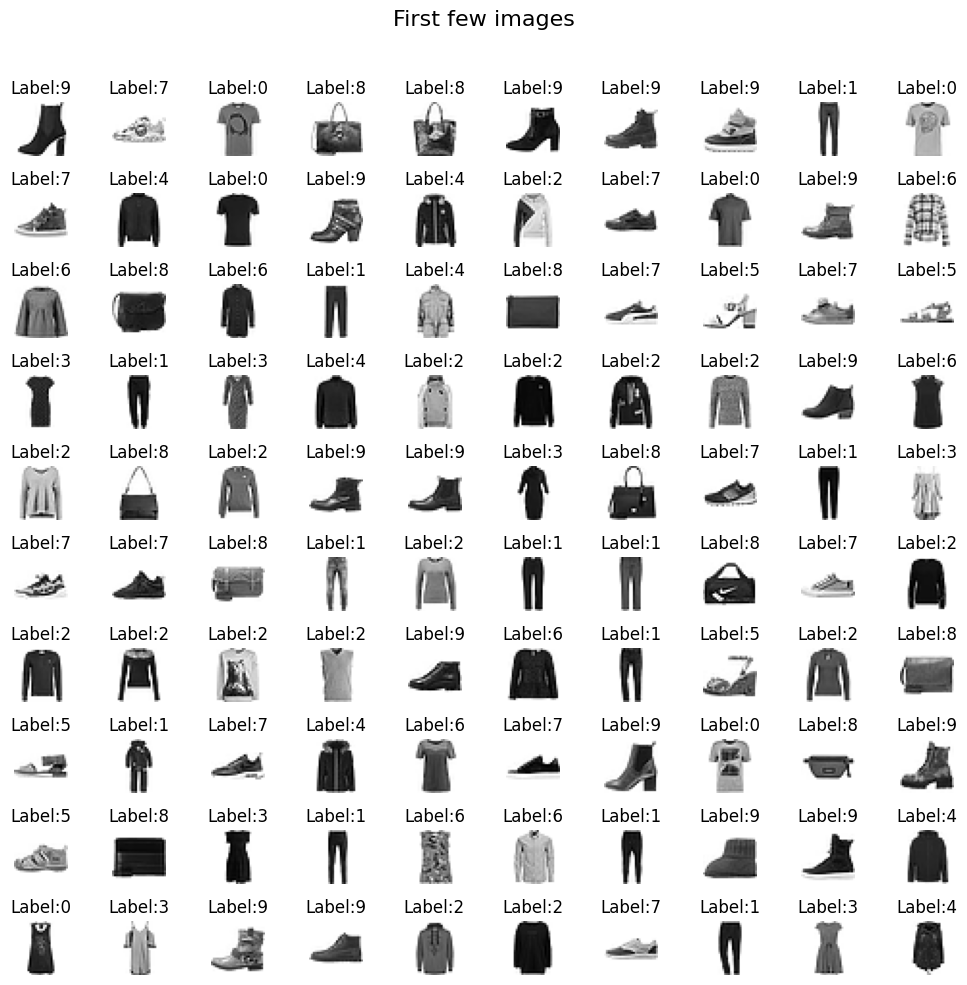

In [5]:
#Visualize the dataset
fig,axes=plt.subplots(10,10,figsize=(10,10))
fig.suptitle("First few images",fontsize=16)

for i,ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28) #reshape to 28x28
  ax.imshow(img,cmap="binary") #display grayscale
  ax.axis("off")
  ax.set_title(f"Label:{df.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,0.96]) #adjust layout to fit the title
plt.show()

In [6]:
#train test split
X=df.iloc[:,1:].values
y=df.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
#scale the features
X_train=X_train/255.0
X_test=X_test/255.0

In [8]:
#create custom dataset
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features=torch.tensor(features,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]

In [9]:
train_dataset=CustomDataset(X_train,y_train)

In [10]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [11]:
test_dataset=CustomDataset(X_test,y_test)

In [12]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32)

In [13]:
# Define the ANN
class ANN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
        )
  def forward(self,x):
    return self.model(x)

In [14]:
epochs=100
learning_rate=0.1

In [15]:
#instantiate the model
model=ANN(X_train.shape[1])
#loss function
loss_function=nn.CrossEntropyLoss()
#optimizer
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [16]:
#Training loop
for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:
    # forward pass
    y_pred=model(batch_features)
    #loss function
    loss=loss_function(y_pred,batch_labels)
    #clear grad
    optimizer.zero_grad()
    #backward pass
    loss.backward()
    #update weights
    optimizer.step()

    total_epoch_loss+=loss.item()
  avg_loss=total_epoch_loss/len(train_loader)
  print(f"Epoch:{epoch+1}, Loss:{avg_loss}")

Epoch:1, Loss:1.3216368440786999
Epoch:2, Loss:0.7793365436792373
Epoch:3, Loss:0.6427524652083715
Epoch:4, Loss:0.5751657336950302
Epoch:5, Loss:0.528180201848348
Epoch:6, Loss:0.49528750121593473
Epoch:7, Loss:0.4602432996034622
Epoch:8, Loss:0.4359459094206492
Epoch:9, Loss:0.41829214423894884
Epoch:10, Loss:0.3984092291692893
Epoch:11, Loss:0.3850264506538709
Epoch:12, Loss:0.3722685620188713
Epoch:13, Loss:0.3477362078428268
Epoch:14, Loss:0.3467242218057315
Epoch:15, Loss:0.3138812760512034
Epoch:16, Loss:0.3126461291313171
Epoch:17, Loss:0.29552092105150224
Epoch:18, Loss:0.2857150869568189
Epoch:19, Loss:0.27084775785605114
Epoch:20, Loss:0.26237100958824155
Epoch:21, Loss:0.25756089876095456
Epoch:22, Loss:0.24232648963729542
Epoch:23, Loss:0.23957946779827277
Epoch:24, Loss:0.2261324493587017
Epoch:25, Loss:0.2233684351791938
Epoch:26, Loss:0.21165308925012746
Epoch:27, Loss:0.21910773759086927
Epoch:28, Loss:0.21103892110288144
Epoch:29, Loss:0.18156708138684433
Epoch:30, Lo

In [17]:
model.eval()

ANN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [18]:
#eval_code
total=0
correct=0
with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    y_pred=model(batch_features)
    _,y_pred=torch.max(y_pred,1)  # as model gives probabilty for each image being label so we find the max of the probability
    total+=batch_labels.shape[0] # size of batch_labels
    correct+=(y_pred==batch_labels).sum().item()
print(correct/total)

0.8325
